In [ ]:
!git clone https://github.com/clovaai/deep-text-recognition-benchmark.git

In [ ]:
%cd deep-text-recognition-benchmark

In [ ]:
!gdown 1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9

In [ ]:
!pip install lmdb

In [ ]:
!pip install fire

In [ ]:
!unzip /content/drive/MyDrive/plate_img-train.zip -d /content/drive/MyDrive/mydataset


In [ ]:
!unzip /content/drive/MyDrive/plate_img-validation.zip -d /content/drive/MyDrive/mydataset


In [ ]:
import shutil
import os


source_folder = '/content/drive/MyDrive/data/data/train'
destination_folder = '/content/drive/MyDrive/mydataset/train'


os.makedirs(destination_folder, exist_ok=True)

files_to_copy = os.listdir(source_folder)

for file_name in files_to_copy:
    source_file_path = os.path.join(source_folder, file_name)
    destination_file_path = os.path.join(destination_folder, file_name)
    shutil.copy(source_file_path, destination_file_path)

print("Files copied successfully.")


Files copied successfully.


In [ ]:
import os
import xml.etree.ElementTree as ET
from lxml import etree
# Directory containing XML files


dict = {
        'الف':'A',
        'ب':'B',
        'پ':'P',
        'ت':'T',
        'ث':'Y',
        'ز':'Z',
        'ش': 'X',
        'ع': 'E',
        'ف': 'F',
        'ک': 'K',
        'گ': 'G',
        'D': 'D',
        'S': 'S',
        'ج': 'J',
        'د': 'W',
        'س': 'C',
        'ص': 'U',
        'ط': 'R',
        'ق': 'Q',
        'ل': 'L',
        'م': 'M',
        'ن': 'N',
        'و': 'V',
        'ه': 'H',
        'ی': 'I',
        '0': '0',
        '1': '1',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7',
        '8': '8',
        '9': '9',
}
xml_dir = '/content/drive/MyDrive/dataset_/train'

output_txt_file = '/content/drive/MyDrive/dataset/gt_validation.txt'

os.makedirs(os.path.dirname(output_txt_file), exist_ok=True)


def extract_and_write_names(xml_file, txt_file):
    parser = etree.XMLParser(encoding="utf-8")
    tree = etree.parse(xml_file, parser=parser)
    root = tree.getroot()


    xml_file_name = os.path.splitext(os.path.basename(xml_file))[0]

    with open(txt_file, 'a', encoding='utf-8') as txt_file:
        txt_file.write(f"validation/{xml_file_name}.jpg")
        txt_file.write("\t")
        for name_element in root.iter('name'):
            name = name_element.text.strip() if name_element.text else ""
            if name in dict:
                txt_file.write(f"{dict[name]}")
            else:
                txt_file.write("@")
        txt_file.write("\n")

for xml_file_name in os.listdir(xml_dir):
    if xml_file_name.endswith('.xml'):

        xml_file_path = os.path.join(xml_dir, xml_file_name)

        extract_and_write_names(xml_file_path, output_txt_file)

print("Extraction completed. Names written to:", output_txt_file)

Extraction completed. Names written to: /content/drive/MyDrive/dataset/gt_validation.txt


In [ ]:
!python3 create_lmdb_dataset.py --inputPath /content/drive/MyDrive/mydataset --gtFile /content/drive/MyDrive/mydataset/gt_train.txt --outputPath /content/drive/MyDrive/dataset/train

In [ ]:
!python3 create_lmdb_dataset.py --inputPath /content/drive/MyDrive/mydataset --gtFile /content/drive/MyDrive/mydataset/gt_validation.txt --outputPath /content/drive/MyDrive/dataset/validation

In [7]:
!python3 train.py \
--train_data /content/drive/MyDrive/dataset/train --valid_data /content/drive/MyDrive/dataset/validation \
--select_data / --batch_ratio 1 --batch_max_length 8 --valInterval 500 --num_iter 4500\
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /content/drive/MyDrive/dataset/train
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /content/drive/MyDrive/dataset/train	 dataset: /
sub-directory:	/.	 num samples: 18211
num total samples of /: 18211 x 1.0 (total_data_usage_ratio) = 18211
num samples of / per batch: 192 x 1.0 (batch_ratio) = 192
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lo

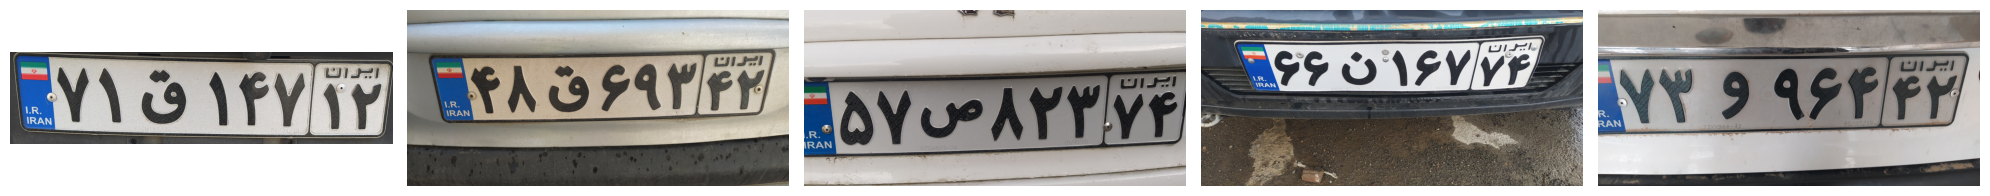

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = [
    "/content/demo_image/lp1.jpg",
    "/content/demo_image/lp2.jpg",
    "/content/demo_image/lp3.jpg",
    "/content/demo_image/lp4.jpg",
    "/content/demo_image/lp5.jpg",
]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, ax in enumerate(axes):
    img = mpimg.imread(image_paths[i])
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()



## Test

In [14]:
!python3 demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder /content/demo_image \
--saved_model /content/drive/MyDrive/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth

model input parameters 32 100 20 1 512 256 38 25 TPS ResNet BiLSTM Attn
loading pretrained model from /content/drive/MyDrive/saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
/content/demo_image/lp1.jpg	71q14712                 	0.9993
/content/demo_image/lp2.jpg	48q69342         